<a href="https://colab.research.google.com/github/ashikshafi08/Learning_Tensorflow/blob/main/Exercise%20Solutions/%F0%9F%9B%A0_08_Introduction_to_NLP_(Natural_Language_Processing)_in_TensorFlow_Exercise_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🛠 08. Introduction to NLP (Natural Language Processing) in TensorFlow Exercises

1. Rebuild, compile and train `model_1`, `model_2` and `model_5` using the Keras Sequential API instead of the Functional API.
2. Retrain the baseline model with 10% of the training data. How does perform compared to the Universal Sentence Encoder model with 10% of the training data?

3. Try fine-tuning the TF Hub Universal Sentence Encoder model by setting training=True when instantiating it as a Keras layer

```
# We can use this encoding layer in place of our text_vectorizer and embedding layer
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape=[],
                                        dtype=tf.string,
                                        trainable=True) # turn training on to fine-tune the TensorFlow Hub model

```

4. Retrain the best model you've got so far on the whole training set (no validation split). Then use this trained model to make predictions on the test dataset and format the predictions into the same format as the `sample_submission.csv` file from Kaggle (see the Files tab in Colab for what the `sample_submission.csv` file looks like). Once you've done this, [make a submission to the Kaggle competition](https://www.kaggle.com/c/nlp-getting-started/data), how did your model perform?

5. Combine the ensemble predictions using the majority vote (mode), how does this perform compare to averaging the prediction probabilities of each model?

6. Make a confusion matrix with the best performing model's predictions on the validation set and the validation ground truth labels.

## Getting the data 

In [1]:
# Importing the needed packages 
import tensorflow as tf
import pandas as pd 
import matplotlib.pyplot as plt 

In [2]:
# Downloading the helper function file 
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

# Importing series of function for our use 
from helper_functions import unzip_data, plot_loss_curves, compare_historys

# Download data (same as from Kaggle)
!wget "https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip"

# Unzip data
unzip_data("nlp_getting_started.zip")


--2021-07-16 09:59:03--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2021-07-16 09:59:03 (108 MB/s) - ‘helper_functions.py’ saved [10246/10246]

--2021-07-16 09:59:04--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.218.128, 142.250.153.128, 173.194.69.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.218.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [ap

In [3]:
# Loading in the data 
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Shuffling the training dataframe 
train_df_shuffled = train_df.sample(frac =1 , random_state= 42)

# Split our data into training and test sets 
from sklearn.model_selection import  train_test_split
train_sentences , val_sentences , train_labels , val_labels = train_test_split(train_df_shuffled['text'].to_numpy() , 
                                                                               train_df_shuffled['target'].to_numpy(), 
                                                                               test_size = 0.1 , 
                                                                               random_state = 42)

# Checking the shapes 
train_sentences.shape , val_sentences.shape , train_labels.shape , val_labels.shape

((6851,), (762,), (6851,), (762,))

Let's convert our text into numbers by"
- Text Vectorization --> Turns our text into tokens
- Embedding --> Turns out tokens into a vector 

In [4]:
# Setting up text vectorization 
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
max_vocab_length = 10000 
max_length = 15 

text_vectorizer = TextVectorization(max_tokens = max_vocab_length , 
                                    output_mode = 'int', 
                                    output_sequence_length = max_length)

# Fit the text vectorizer to the training text
text_vectorizer.adapt(train_sentences)

# Creating a embedding layer 
from tensorflow.keras import layers 

embedding = layers.Embedding(input_dim= max_vocab_length , 
                             output_dim = 128 , 
                             embeddings_initializer = 'uniform', 
                             input_length = max_vocab_length)


Alright now it's time to jump into exercises! 

### 1. Rebuild, compile and train `model_1`, `model_2` and `model_5` using the Keras Sequential API instead of the Functional API.

**Model_1**

In [5]:
# Building the model 1 (A simple Dense model)
model_1 = tf.keras.Sequential([
    layers.Input(shape = (1, ) , dtype = 'string'), 
    text_vectorizer , 
    embedding , 
    layers.GlobalAveragePooling1D() , 
    layers.Dense(1, activation = 'sigmoid')
    ])
    
# Compiling the model 
model_1.compile(loss = tf.keras.losses.BinaryCrossentropy() , 
                optimizer = tf.keras.optimizers.Adam() , 
                metrics = ['accuracy'])

# Fitting the model 
model_1_history =  model_1.fit(train_sentences, 
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels))

Epoch 1/5
215/215 [==============================] - 3s 9ms/step - loss: 0.6129 - accuracy: 0.6888 - val_loss: 0.5380 - val_accuracy: 0.7585
Epoch 2/5
215/215 [==============================] - 2s 9ms/step - loss: 0.4431 - accuracy: 0.8178 - val_loss: 0.4697 - val_accuracy: 0.7874
Epoch 3/5
215/215 [==============================] - 2s 9ms/step - loss: 0.3475 - accuracy: 0.8596 - val_loss: 0.4590 - val_accuracy: 0.7861
Epoch 4/5
215/215 [==============================] - 2s 9ms/step - loss: 0.2847 - accuracy: 0.8880 - val_loss: 0.4709 - val_accuracy: 0.7927
Epoch 5/5
215/215 [==============================] - 2s 9ms/step - loss: 0.2383 - accuracy: 0.9101 - val_loss: 0.4783 - val_accuracy: 0.7795


**Model_2**

In [6]:
# Building the model 2 (An LSTM model)
model_2 = tf.keras.Sequential([
    layers.Input(shape = (1, ) , dtype = 'string'), 
    text_vectorizer , 
    embedding , 
    layers.LSTM(64), 
    #layers.GlobalAveragePooling1D() , 
    layers.Dense(1, activation = 'sigmoid')
    ])
    
# Compiling the model 
model_2.compile(loss = tf.keras.losses.BinaryCrossentropy() , 
                optimizer = tf.keras.optimizers.Adam() , 
                metrics = ['accuracy'])

# Fitting the model 
model_2_history =  model_1.fit(train_sentences, 
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels))

Epoch 1/5
215/215 [==============================] - 2s 9ms/step - loss: 0.2016 - accuracy: 0.9294 - val_loss: 0.5041 - val_accuracy: 0.7861
Epoch 2/5
215/215 [==============================] - 2s 9ms/step - loss: 0.1736 - accuracy: 0.9402 - val_loss: 0.5268 - val_accuracy: 0.7861
Epoch 3/5
215/215 [==============================] - 2s 9ms/step - loss: 0.1495 - accuracy: 0.9480 - val_loss: 0.5566 - val_accuracy: 0.7795
Epoch 4/5
215/215 [==============================] - 2s 9ms/step - loss: 0.1315 - accuracy: 0.9550 - val_loss: 0.5868 - val_accuracy: 0.7756
Epoch 5/5
215/215 [==============================] - 2s 9ms/step - loss: 0.1171 - accuracy: 0.9618 - val_loss: 0.6140 - val_accuracy: 0.7743


**Model_5** 

In [7]:
# Building the model 5 (Conv1D Model)
# Building the model 1 (A simple Dense model)
model_5 = tf.keras.Sequential([
    layers.Input(shape = (1, ) , dtype = 'string'), 
    text_vectorizer , 
    embedding , 
    layers.Conv1D(32 , 5 , activation= 'relu'),
    layers.GlobalMaxPool1D() , 
    layers.Dense(1, activation = 'sigmoid')
    ])
    
# Compiling the model 
model_5.compile(loss = tf.keras.losses.BinaryCrossentropy() , 
                optimizer = tf.keras.optimizers.Adam() , 
                metrics = ['accuracy'])

# Fitting the model 
model_5_history =  model_1.fit(train_sentences, 
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels))

Epoch 1/5
215/215 [==============================] - 2s 8ms/step - loss: 0.1049 - accuracy: 0.9644 - val_loss: 0.6500 - val_accuracy: 0.7717
Epoch 2/5
215/215 [==============================] - 2s 9ms/step - loss: 0.0956 - accuracy: 0.9689 - val_loss: 0.6794 - val_accuracy: 0.7703
Epoch 3/5
215/215 [==============================] - 2s 8ms/step - loss: 0.0867 - accuracy: 0.9710 - val_loss: 0.7105 - val_accuracy: 0.7690
Epoch 4/5
215/215 [==============================] - 2s 8ms/step - loss: 0.0805 - accuracy: 0.9726 - val_loss: 0.7373 - val_accuracy: 0.7664
Epoch 5/5
215/215 [==============================] - 2s 9ms/step - loss: 0.0741 - accuracy: 0.9753 - val_loss: 0.7741 - val_accuracy: 0.7664


### 2. Retrain the baseline model with 10% of the training data. How does perform compared to the Universal Sentence Encoder model with 10% of the training data?

In [8]:
# Making a better dataset split (no data leakage)
train_10_percent_split = int(0.1 * len(train_sentences)) # Directly taking 10% from our train data
print(train_10_percent_split)

# Splitting our train data with the actual train_data (no double dipping this time)
train_sentences_10_percent = train_sentences[:train_10_percent_split]

# Doing the same but with the train labels 
train_labels_10_percent = train_labels[:train_10_percent_split]
len(train_labels_10_percent) , train_labels_10_percent[:5]

685


(685, array([0, 0, 1, 0, 0]))

In [9]:
# Building a base line model 
from sklearn.feature_extraction.text import TfidfVectorizer # (turn text into numbers)
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline 

# Create tokenization and modelling pipeline
baseline_model = Pipeline([
                  ('tfidf' , TfidfVectorizer()) , # Convert words to numbers using tfidf
                  ('clf' , MultinomialNB()), # Model the text 
                ])

# Fit the pipeline to the training data 
baseline_model.fit(train_sentences_10_percent , train_labels_10_percent)

# Evaluating our baseline model 
baseline_score = baseline_model.score(val_sentences , val_labels)
baseline_score

0.7020997375328084

Our **Universal Sentence Encoder** model outperformed our **baseline model** with just 10% of the training data. 

### 3. Try fine-tuning the TF Hub Universal Sentence Encoder model by setting training=True when instantiating it as a Keras layer

In [10]:
# Turn training on to fine-tune the TensorFlow Hub model
import tensorflow_hub as hub
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape=[],
                                        dtype=tf.string,
                                        trainable=True) 

In [11]:
# Create model using the Sequential API
use_model = tf.keras.Sequential([
  sentence_encoder_layer, 
  layers.Dense(1, activation="sigmoid")
])

# Compile model
use_model.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Train a classifier on top of pretrained embeddings
use_model_history = use_model.fit(train_sentences_10_percent,
                              train_labels_10_percent,
                              epochs=5,
                              validation_data=(val_sentences, val_labels))

Epoch 1/5
22/22 [==============================] - 33s 1s/step - loss: 0.6195 - accuracy: 0.6599 - val_loss: 0.5592 - val_accuracy: 0.7717
Epoch 2/5
22/22 [==============================] - 27s 1s/step - loss: 0.4614 - accuracy: 0.8277 - val_loss: 0.4988 - val_accuracy: 0.7861
Epoch 3/5
22/22 [==============================] - 27s 1s/step - loss: 0.3211 - accuracy: 0.8964 - val_loss: 0.4728 - val_accuracy: 0.7979
Epoch 4/5
22/22 [==============================] - 27s 1s/step - loss: 0.1868 - accuracy: 0.9620 - val_loss: 0.5172 - val_accuracy: 0.7743
Epoch 5/5
22/22 [==============================] - 27s 1s/step - loss: 0.1163 - accuracy: 0.9854 - val_loss: 0.5333 - val_accuracy: 0.7822


### 4. Retrain the best model you've got so far on the whole training set (no validation split). 

Then use this trained model to make predictions on the test dataset and format the predictions into the same format as the sample_submission.csv file from Kaggle (see the Files tab in Colab for what the sample_submission.csv file looks like). Once you've done this, make a submission to the Kaggle competition, how did your model perform?

In [12]:
whole_train_sentences = train_df_shuffled['text'].to_numpy()
whole_train_labels =  train_df_shuffled['target'].to_numpy() 

len(whole_train_sentences) , len(whole_train_labels)

(7613, 7613)

In [13]:
# Create model using the Sequential API
model = tf.keras.Sequential([
  sentence_encoder_layer, 
  layers.Dense(64 , activation ='relu'),
  layers.Dense(1, activation="sigmoid")
])

# Compile model
model.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Train a classifier on top of pretrained embeddings
model_history =model.fit(whole_train_sentences,
                              whole_train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels))

Epoch 1/5
238/238 [==============================] - 296s 1s/step - loss: 0.4133 - accuracy: 0.8235 - val_loss: 0.2616 - val_accuracy: 0.9016
Epoch 2/5
238/238 [==============================] - 302s 1s/step - loss: 0.1956 - accuracy: 0.9274 - val_loss: 0.0638 - val_accuracy: 0.9843
Epoch 3/5
238/238 [==============================] - 299s 1s/step - loss: 0.0675 - accuracy: 0.9777 - val_loss: 0.0275 - val_accuracy: 0.9895
Epoch 4/5
238/238 [==============================] - 305s 1s/step - loss: 0.0373 - accuracy: 0.9883 - val_loss: 0.0305 - val_accuracy: 0.9882
Epoch 5/5
238/238 [==============================] - 298s 1s/step - loss: 0.0279 - accuracy: 0.9895 - val_loss: 0.0305 - val_accuracy: 0.9895


In [14]:
# Make predictions with the model
pred_probs = model.predict(test_df['text'].to_numpy())

# Convert prediction probs to labels
preds = tf.squeeze(tf.round(pred_probs))
preds = tf.cast(preds , dtype = tf.int32)

In [15]:
test_df

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


In [16]:
submission = pd.DataFrame({'id': test_df['id'].values , 
                           'target': (preds.numpy())})
submission

,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1
...,...,...
3258,10861,1
3259,10865,1
3260,10868,1
3261,10874,1


In [17]:
preds[:20]

<tf.Tensor: shape=(20,), dtype=int32, numpy=
array([1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
      dtype=int32)>

In [18]:
submission.to_csv('submission.csv' , index = False)

Alright we have made a submission! 

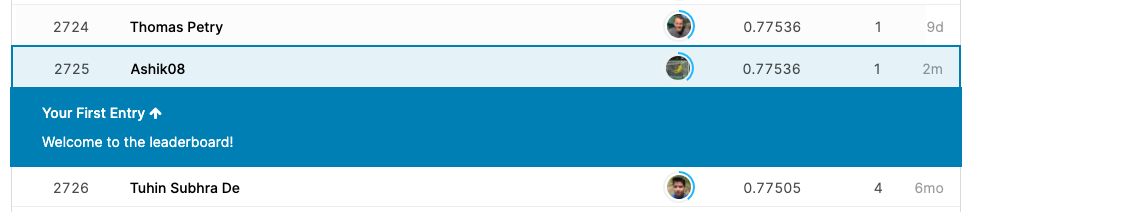

### 5. Combine the ensemble predictions using the majority vote (mode), how does this perform compare to averaging the prediction probabilities of each model?

- `model_5` -> Conv1D Model 
- `model_2` --> LSTM Model 
- `model` --> TFHub Model

Now let's get the predictions for each model and perform majority model 

In [21]:
test_sentences = test_df['text'].to_numpy()

# Checking the shapes 
test_sentences.shape 

(3263,)

In [22]:
# Getting the model predictions 

def give_preds(model, test_sentences):
  '''
  This model takes a model and the test sentences as input. 
  Returns the prediction array of [0,1.....]
  '''
  pred_probs = model.predict(test_sentences)
  preds = tf.squeeze(tf.round(pred_probs))
  preds = tf.cast(preds , dtype = tf.int32)

  return preds

f1 , f2 and f3 are models 


In [26]:
# Getting the predictions for our 3 models 
model_preds = give_preds(model , test_sentences)
model_2_preds = give_preds(model_2 ,test_sentences)
model_5_preds = give_preds(model_5 , test_sentences)

# Checking the shapes of our prediction 
model_preds.shape , model_2_preds.shape , model_5_preds.shape

(TensorShape([3263]), TensorShape([3263]), TensorShape([3263]))

In [27]:
model_preds[:5] , model_2_preds[:5] , model_5_preds[:5]

(<tf.Tensor: shape=(5,), dtype=int32, numpy=array([1, 1, 1, 1, 1], dtype=int32)>,
 <tf.Tensor: shape=(5,), dtype=int32, numpy=array([0, 0, 1, 0, 0], dtype=int32)>,
 <tf.Tensor: shape=(5,), dtype=int32, numpy=array([0, 0, 0, 0, 0], dtype=int32)>)

In [42]:
# Creating a dataframe of our predictions 

preds_df = pd.DataFrame({'USE_model': model_preds , 
              'LSTM_model': model_2_preds , 
              'Conv1D_model': model_5_preds})
preds_df.head()

,USE_model,LSTM_model,Conv1D_model
0,1,0,0
1,1,0,0
2,1,1,0
3,1,0,0
4,1,0,0


In [48]:
# Majority voted predictions of our model
preds_df['majority_vote_preds'] = preds_df.mode(axis = 1)
preds_df.head()

,USE_model,LSTM_model,Conv1D_model,majority_vote_preds
0,1,0,0,0
1,1,0,0,0
2,1,1,0,1
3,1,0,0,0
4,1,0,0,0


In [49]:
# Converting the column into a numpy array 
mode_preds_array = preds_df['majority_vote_preds'].to_numpy()
mode_preds_array

array([0, 0, 1, ..., 0, 0, 0], dtype=int32)

### 6. Make a confusion matrix with the best performing model's predictions on the validation set and the validation ground truth labels.

Our best performing model is the `model` from the tensorflow hub. 

In [50]:
# Funtion taken from the course 
# Note: The following confusion matrix code is a remix of Scikit-Learn's 
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
import itertools
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15, norm=False, savefig=False): 
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
    norm: normalize values or not (default=False).
    savefig: save confusion matrix to file (default=False).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """  
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  ### Added: Rotate xticks for readability & increase font size (required due to such a large confusion matrix)
  plt.xticks(rotation=70, fontsize=text_size)
  plt.yticks(fontsize=text_size)

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    if norm:
      plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)
    else:
      plt.text(j, i, f"{cm[i, j]}",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)

  # Save the figure to the current working directory
  if savefig:
    fig.savefig("confusion_matrix.png")

In [57]:
# Predictions on the validation sentences 
val_preds = give_preds(model , val_sentences)

# Creating a array of our class names 
class_names = ['not_a_disaster' , 'disaster']

# Checking the preds and true labels shape
val_preds.shape , val_labels.shape

(TensorShape([762]), (762,))

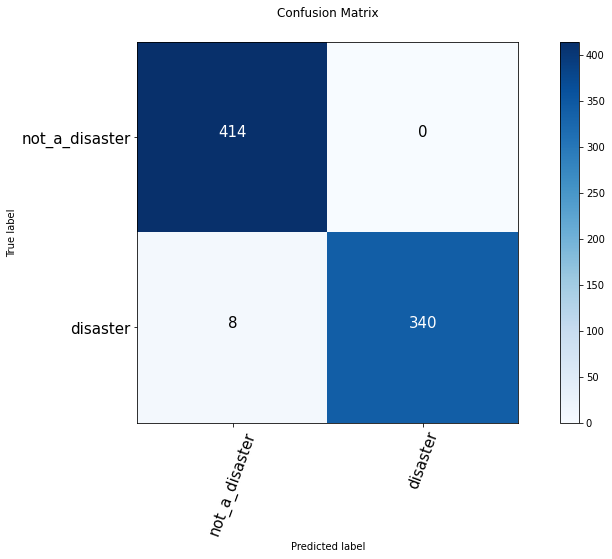

In [61]:
# Plotting the confusion matrix 
make_confusion_matrix(y_true= val_labels , 
                      y_pred = val_preds , 
                      classes = class_names , 
                      figsize= (15 , 7), 
                      norm = False , 
                      savefig = True , 
                      text_size = 15)